https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn import linear_model, neighbors, datasets, preprocessing, metrics, svm
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [2]:
# Utilizaremos solo imagenes de 7 personas con mas de 70 imagenes disponibles.
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4, color=False, download_if_missing=True)

# Inspeccion de los tamaños
n_samples, h, w = lfw_people.images.shape

# Datos sin divir en subconjuntos
X = lfw_people.images

# Etiquetas y clases
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
# print(lfw_people.images.shape)
print("Total dataset size:")
print("h, w: (%d, %d)" % (h, w))
print("n_samples: %d" % n_samples)
print("n_classes: %d" % n_classes)

Total dataset size:
h, w: (50, 37)
n_samples: 1288
n_classes: 7


In [3]:
print(target_names)
print(X.shape)
print(y.shape)
print(y[0])
print(X[0])

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 50, 37)
(1288,)
5
[[0.9973857  0.99607843 0.9921568  ... 0.29803923 0.24836601 0.20653595]
 [0.9973857  0.9921569  0.9908497  ... 0.30588236 0.2535948  0.21568628]
 [0.96078426 0.93071896 0.8679738  ... 0.2875817  0.24183007 0.21568628]
 ...
 [0.34509805 0.26143792 0.17385621 ... 0.4248366  0.40261438 0.39084968]
 [0.30980393 0.23398693 0.17124183 ... 0.39869282 0.4013072  0.3764706 ]
 [0.28366014 0.2248366  0.18039216 ... 0.38169935 0.38823533 0.3803922 ]]


In [4]:
#Funciones para graficar
def plot_gallery(images, number, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(number):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y, target_names):
    return "%s" % (target_names[y])

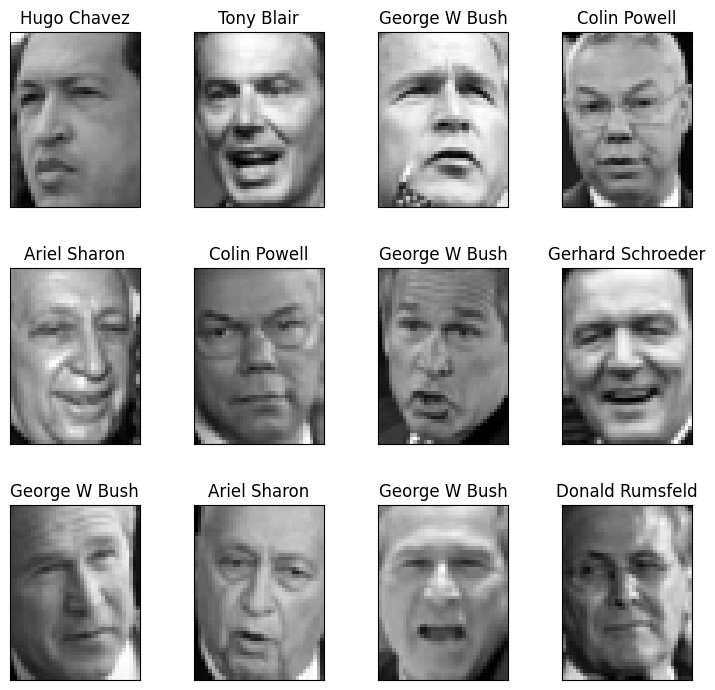

In [5]:
titles = [title(y[i], target_names) for i in range(20)]
plot_gallery(X, 12 , titles, h, w)

In [6]:
print(X[0])

[[0.9973857  0.99607843 0.9921568  ... 0.29803923 0.24836601 0.20653595]
 [0.9973857  0.9921569  0.9908497  ... 0.30588236 0.2535948  0.21568628]
 [0.96078426 0.93071896 0.8679738  ... 0.2875817  0.24183007 0.21568628]
 ...
 [0.34509805 0.26143792 0.17385621 ... 0.4248366  0.40261438 0.39084968]
 [0.30980393 0.23398693 0.17124183 ... 0.39869282 0.4013072  0.3764706 ]
 [0.28366014 0.2248366  0.18039216 ... 0.38169935 0.38823533 0.3803922 ]]


## Ejercicio 2


### 1) (10 ptos) Aplicar el algoritmo PCA a los datos. El porcentaje de varianza explicada sea mayor al 80%. 

In [7]:

pca_temp = PCA()
X_2D = lfw_people.data
pca_temp.fit(X_2D)
cumsum = np.cumsum(pca_temp.explained_variance_ratio_)
n_components = np.where(cumsum >= 0.86)[0][0] + 1

print(f"Número de componentes para explicar > 80% de la varianza: {n_components}")
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True, random_state=42)
X_pca = pca.fit_transform(X_2D)

print(f"Dimensiones del dataset después de PCA: {X_pca.shape}")

Número de componentes para explicar > 80% de la varianza: 59
Dimensiones del dataset después de PCA: (1288, 59)


### 2) (5 ptos) Separar el dataset en conjuntos de entrenamiento y prueba utilizando el comando train_test_split. La fracción de datos de prueba debe estar entre 20% y 30%

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.20, random_state=42
)

### 3) (10 ptos) Determinar un modelo de clasificación basado en regresión logística, utilizando el conjunto de entrenamiento. Evalúe el desempeño del modelo sobre el conjunto de prueba, determinando la precisión (accuracy) y la matriz de confusión 

In [9]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def plot_matriz_confusion(matriz):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicción')
    plt.ylabel('Etiqueta Real')
    plt.title('Matriz de Confusión - Regresión Logística')
    plt.show()
    print("-" * 30)

Precisión (Accuracy) del modelo de Regresión Logística: 0.8101


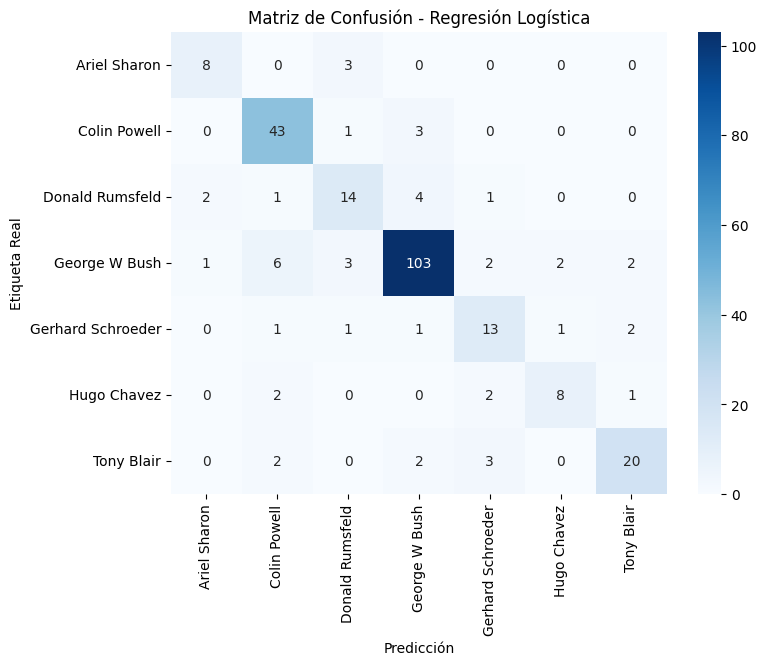

------------------------------


In [10]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(f"Precisión (Accuracy) del modelo de Regresión Logística: {accuracy_log_reg:.4f}")

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plot_matriz_confusion(cm_log_reg)


### 4) (10 ptos) Determinar un modelo de clasificación basado en KNN, utilizando el conjunto de entrenamiento. Evalúe el desempeño del modelo sobre el conjunto de prueba, determinando la precisión (accuracy) y la matriz de confusión 

Precisión (Accuracy) del modelo KNN: 0.7248


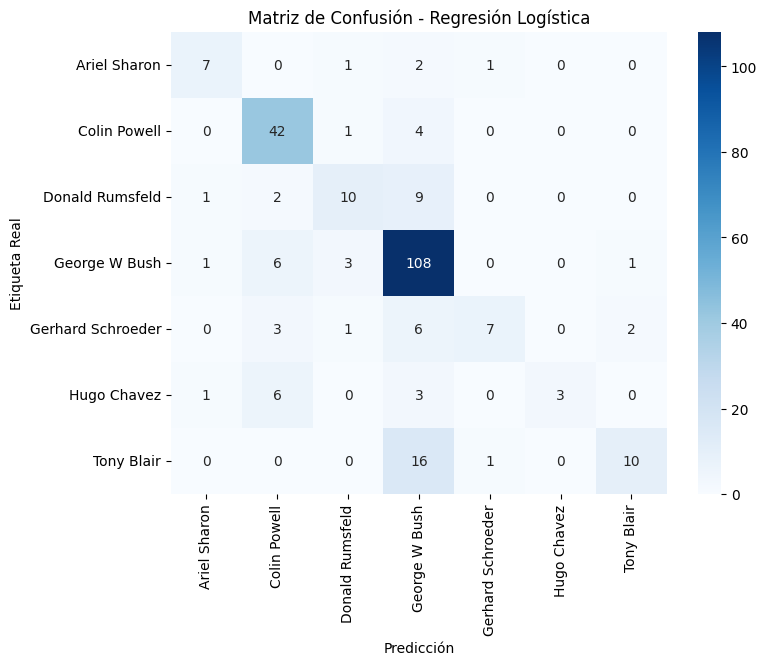

------------------------------


In [11]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Precisión (Accuracy) del modelo KNN: {accuracy_knn:.4f}")

cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_matriz_confusion(cm_knn)

No he logrado un accuracy superior a 0.80, el mayor valor, 0.72, fue alcanzado con 8 vecinos mas cercanos.

### 5) (10 ptos) Determinar un modelo de clasificación basado en SVM, utilizando el conjunto de entrenamiento. Evalúe el desempeño del modelo sobre el conjunto de prueba, determinando la precisión (accuracy) y la matriz de confusión 

Precisión (Accuracy) del modelo SVM: 0.8488


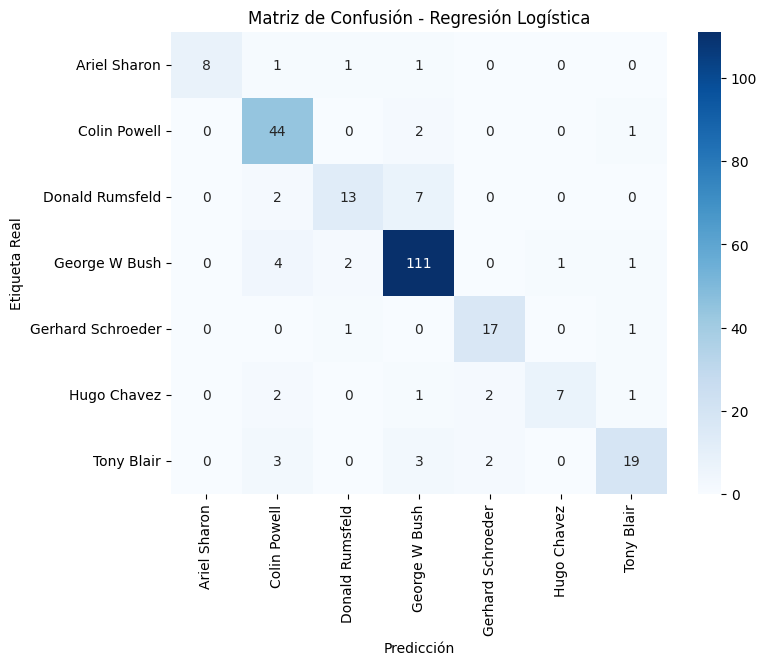

------------------------------


In [12]:
svm = SVC(kernel='rbf', class_weight='balanced', random_state=42, C=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Precisión (Accuracy) del modelo SVM: {accuracy_svm:.4f}")

# Matriz de Confusión para SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_matriz_confusion(cm_svm)

Debido a la precision de 0.80 y una buena matriz de confusion se observa que el modelo SVM con un kernel curvo rbf ha logrado clasificar los distintos vectores X, pixeles de la imagen, con la persona de la imagen correspondiente. Use un margen de 1 en mi frontera de decision porque es el unico valor donde el accuracy daba > 0.80

## 6) Conclusiones

Mejores modelos de clasificacion : SVM y regresion logistica. SVM demostró ser el modelo más robusto y preciso. Con un kernel del tipo rbf y un margen de 1, la frontera de decision sobre las imagenes tuvo un accuracy mayor al 0.80. Ademas, clasificando los vectores, imagenes, mediante regresion logistica se obtuvo un accuracy del 0.81.

A su vez en las matrices de confusion se aprecia como el modelo predice correctamente las personas de las imagenes en comparacion a la etiqueta real.

Por otro lado, la clasificacion de KNN no obtuvo el accuracy minimo de 0.80. Modifique los numeros de vecinos considerados para clasificar, "n", a distintos valores donde n = 8 fue donde obtuve un mayor accuracy.

Para que dos modelos den un accuracy mayor al 80% tuve que modificar la cantidad de PC en PCA. Usar 34 PC, cuya varianza explicada total daba 80% no fue suficiente. Entonces ascendi el valor a 86% el cual me obtuvo 59 PC. Si bien esa mayor cantidad de PC dificulta el algoritmo, pues  tiene mas dimensiones, me dio mejores resultados. Ademas la diferencia entre PC 34 y PC59 no es tanta teniendo en cuenta las 1200 dimensiones iniciales

La reducción de dimensionalidad con PCA no solo aceleró el entrenamiento de los modelos, sino que también ayudó a eliminar el ruido y a enfocarse en las características más distintivas de los rostros, lo que probablemente mejoró la precisión de los clasificadores.